# Exploratory Data Analysis

This is an exploratory data analysis on a series of machine learning datasets that have been combined into one large dataset. The aim of this dataset is to test and train an intrusion detection system machine learning algorithm. The goal for this assignment is to identify significant variables and gain a better understanding of the data prior to building a model.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import statsmodels.api as sm 
from statsmodels.graphics.api import abline_plot 
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import train_test_split 
from sklearn import linear_model, preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

### Data Understanding

<p> This section explores the shape of the data, the contents of the data, and aims to discern if there are any abnormalities within the data (i.e. data types that don't make sense) and why those abnormalities exist. Those abnormalities will also be corrected.</p>

In [2]:
#import .csv
df = pd.read_csv("df.csv")

In [3]:
df.shape

(2830743, 81)

In [4]:
df.head()

,Unnamed: 0,Table,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,DDoS,54865,3,2,0,12,0,6,6,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,1,DDoS,55054,109,1,1,6,6,6,6,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,2,DDoS,55055,52,1,1,6,6,6,6,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,3,DDoS,46236,34,1,1,6,6,6,6,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,4,DDoS,54863,3,2,0,12,0,6,6,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2830743 entries, 0 to 2830742
Data columns (total 81 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   Unnamed: 0                    int64  
 1   Table                         object 
 2    Destination Port             int64  
 3    Flow Duration                int64  
 4    Total Fwd Packets            int64  
 5    Total Backward Packets       int64  
 6   Total Length of Fwd Packets   int64  
 7    Total Length of Bwd Packets  int64  
 8    Fwd Packet Length Max        int64  
 9    Fwd Packet Length Min        int64  
 10   Fwd Packet Length Mean       float64
 11   Fwd Packet Length Std        float64
 12  Bwd Packet Length Max         int64  
 13   Bwd Packet Length Min        int64  
 14   Bwd Packet Length Mean       float64
 15   Bwd Packet Length Std        float64
 16  Flow Bytes/s                  float64
 17   Flow Packets/s               float64
 18   Flow IAT Mean        

In [6]:
df.columns

Index(['Unnamed: 0', 'Table', ' Destination Port', ' Flow Duration',
       ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length',
       ' Packet Length Mean', ' Packet Length Std', ' Pac

In [7]:
#remove extra spaces from column names
df.rename(columns=lambda x: x.replace(" ", ""), inplace=True)
df.drop('Unnamed:0', axis=1, inplace=True)

In [8]:
df.columns

Index(['Table', 'DestinationPort', 'FlowDuration', 'TotalFwdPackets',
       'TotalBackwardPackets', 'TotalLengthofFwdPackets',
       'TotalLengthofBwdPackets', 'FwdPacketLengthMax', 'FwdPacketLengthMin',
       'FwdPacketLengthMean', 'FwdPacketLengthStd', 'BwdPacketLengthMax',
       'BwdPacketLengthMin', 'BwdPacketLengthMean', 'BwdPacketLengthStd',
       'FlowBytes/s', 'FlowPackets/s', 'FlowIATMean', 'FlowIATStd',
       'FlowIATMax', 'FlowIATMin', 'FwdIATTotal', 'FwdIATMean', 'FwdIATStd',
       'FwdIATMax', 'FwdIATMin', 'BwdIATTotal', 'BwdIATMean', 'BwdIATStd',
       'BwdIATMax', 'BwdIATMin', 'FwdPSHFlags', 'BwdPSHFlags', 'FwdURGFlags',
       'BwdURGFlags', 'FwdHeaderLength', 'BwdHeaderLength', 'FwdPackets/s',
       'BwdPackets/s', 'MinPacketLength', 'MaxPacketLength',
       'PacketLengthMean', 'PacketLengthStd', 'PacketLengthVariance',
       'FINFlagCount', 'SYNFlagCount', 'RSTFlagCount', 'PSHFlagCount',
       'ACKFlagCount', 'URGFlagCount', 'CWEFlagCount', 'ECEFlagCount',

In [9]:
label_benign = df[df['Label'] == 'BENIGN']
len(label_benign)

2273097

In [10]:
label_malicious = df[df['Label'] != 'BENIGN']
len(label_malicious)

557646

In [11]:
#these will be used during the feature selection process
df["Label"].unique()

array(['BENIGN', 'DDoS', 'PortScan', 'Bot', 'Infiltration',
       'Web Attack � Brute Force', 'Web Attack � XSS',
       'Web Attack � Sql Injection', 'FTP-Patator', 'SSH-Patator',
       'DoS slowloris', 'DoS Slowhttptest', 'DoS Hulk', 'DoS GoldenEye',
       'Heartbleed'], dtype=object)

<p>The target variable in this dataset is the Label column, as this tells us whether or not an intrusion has occured. The next steps will look for variables with the most correlation to the Label column.</p>

## Feature Analysis

<p> This section explores the distribution of each feature using histograms, box plots, or density plots, examines summary statistics such as mean, median, standard deviation, and range, and identifies potential outliers or extreme values that may require further investigation.</p>

In [12]:
df.describe()

,DestinationPort,FlowDuration,TotalFwdPackets,TotalBackwardPackets,TotalLengthofFwdPackets,TotalLengthofBwdPackets,FwdPacketLengthMax,FwdPacketLengthMin,FwdPacketLengthMean,FwdPacketLengthStd,...,act_data_pkt_fwd,min_seg_size_forward,ActiveMean,ActiveStd,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin
count,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,...,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06
mean,8.071483e+03,1.478566e+07,9.361160e+00,1.039377e+01,5.493024e+02,1.616264e+04,2.075999e+02,1.871366e+01,5.820194e+01,6.891013e+01,...,5.418218e+00,-2.741688e+03,8.155132e+04,4.113412e+04,1.531825e+05,5.829582e+04,8.316037e+06,5.038439e+05,8.695752e+06,7.920031e+06
std,1.828363e+04,3.365374e+07,7.496728e+02,9.973883e+02,9.993589e+03,2.263088e+06,7.171848e+02,6.033935e+01,1.860912e+02,2.811871e+02,...,6.364257e+02,1.084989e+06,6.485999e+05,3.933815e+05,1.025825e+06,5.770923e+05,2.363008e+07,4.602984e+06,2.436689e+07,2.336342e+07
min,0.000000e+00,-1.300000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,-5.368707e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.300000e+01,1.550000e+02,2.000000e+00,1.000000e+00,1.200000e+01,0.000000e+00,6.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,...,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,8.000000e+01,3.131600e+04,2.000000e+00,2.000000e+00,6.200000e+01,1.230000e+02,3.700000e+01,2.000000e+00,3.400000e+01,0.000000e+00,...,1.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,4.430000e+02,3.204828e+06,5.000000e+00,4.000000e+00,1.870000e+02,4.820000e+02,8.100000e+01,3.600000e+01,5.000000e+01,2.616295e+01,...,2.000000e+00,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,6.553500e+04,1.200000e+08,2.197590e+05,2.919220e+05,1.290000e+07,6.554530e+08,2.482000e+04,2.325000e+03,5.940857e+03,7.125597e+03,...,2.135570e+05,1.380000e+02,1.100000e+08,7.420000e+07,1.100000e+08,1.100000e+08,1.200000e+08,7.690000e+07,1.200000e+08,1.200000e+08


In [13]:
df['Label'].value_counts()

BENIGN                        2273097
DoS Hulk                       231073
PortScan                       158930
DDoS                           128027
DoS GoldenEye                   10293
FTP-Patator                      7938
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1966
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: Label, dtype: int64

In [14]:
#creating a numerical label for each categorical label to use the data in future steps
label_encoder = LabelEncoder()
df['label_code'] = label_encoder.fit_transform(df['Label'])

#verifying it generated correctly
print(df['label_code'].value_counts())

0     2273097
4      231073
10     158930
2      128027
3       10293
7        7938
11       5897
6        5796
5        5499
1        1966
12       1507
14        652
9          36
13         21
8          11
Name: label_code, dtype: int64


In [15]:
#creating a label legend for use in future steps
label_legend = list(zip(df['Label'].unique(), df['label_code'].unique()))
print(label_legend)

[('BENIGN', 0), ('DDoS', 2), ('PortScan', 10), ('Bot', 1), ('Infiltration', 9), ('Web Attack � Brute Force', 12), ('Web Attack � XSS', 14), ('Web Attack � Sql Injection', 13), ('FTP-Patator', 7), ('SSH-Patator', 11), ('DoS slowloris', 6), ('DoS Slowhttptest', 5), ('DoS Hulk', 4), ('DoS GoldenEye', 3), ('Heartbleed', 8)]


<AxesSubplot:>

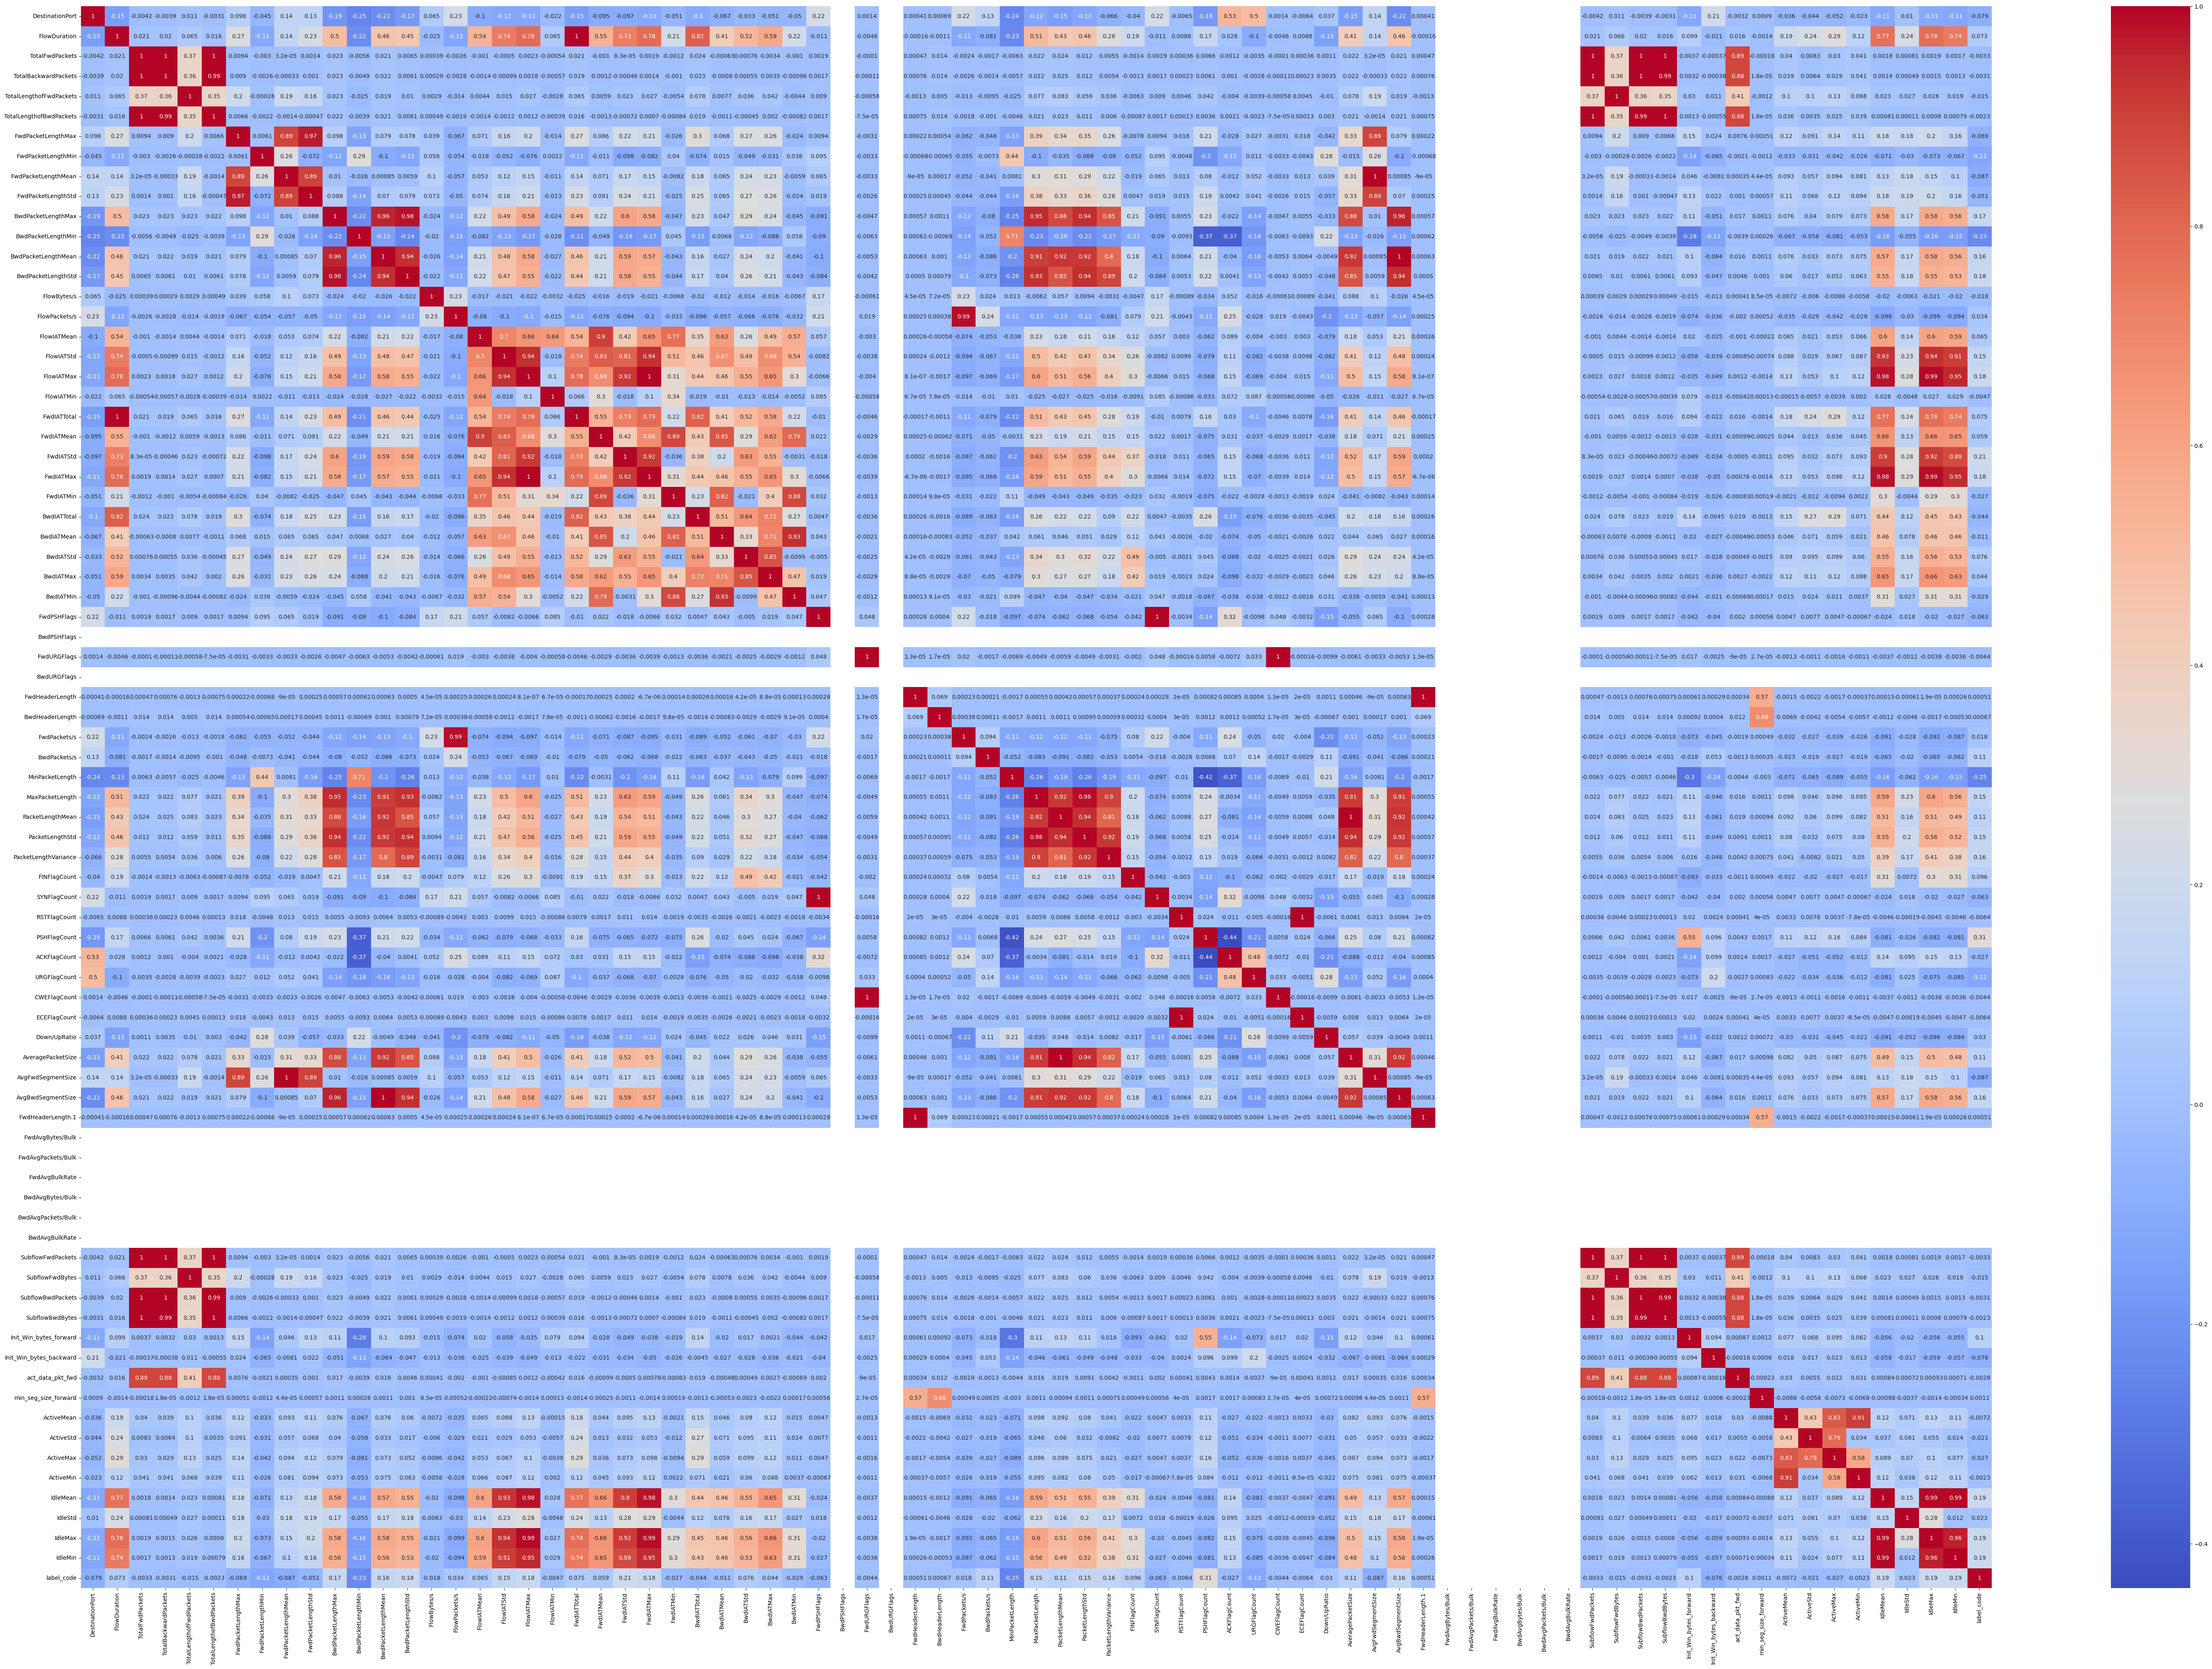

In [23]:
plt.figure(figsize=(75,50))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [17]:
#I plan on using decision trees after this and feature selection (I haven't decided which yet), but the above heat map would
#not load for the life of me and it took days of troubleshooting and multiple computers to get it to load, so I'm submitting
#what I have for now for feedback.